In [1]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_data.csv')

# Display the first few rows
print("Cleaned Data:")
print(df.head())

# Get summary statistics
print("Summary Statistics:")
print(df.describe())

# Check for missing values
print("Missing Values:")
print(df.isnull().sum())


Cleaned Data:
  country  year   population  primary_energy_consumption  \
0  Africa  1965  321447378.0                     716.321   
1  Africa  1966  329658389.0                     750.133   
2  Africa  1967  338159967.0                     757.934   
3  Africa  1968  346980412.0                     800.596   
4  Africa  1969  356070643.0                     822.668   

   fossil_fuel_consumption  renewables_share_energy  energy_per_capita  \
0                  675.202                    5.740           0.000002   
1                  704.270                    6.114           0.000002   
2                  710.059                    6.317           0.000002   
3                  744.596                    6.995           0.000002   
4                  757.316                    7.944           0.000002   

   fossil_fuel_per_capita  
0                0.000002  
1                0.000002  
2                0.000002  
3                0.000002  
4                0.000002  
Summary Stat

In [2]:
# Top 10 energy-consuming countries
top_energy_countries = df.groupby('country')['primary_energy_consumption'].sum().nlargest(10)
print("Top 10 Energy Consuming Countries:")
print(top_energy_countries)


Top 10 Energy Consuming Countries:
country
World                            6197106.982
High-income countries            3389649.472
Asia                             2225982.180
Upper-middle-income countries    2090189.327
Europe                           1798407.409
North America                    1651620.139
United States                    1353940.248
European Union (27)               960543.284
China                             922517.262
Lower-middle-income countries     516928.850
Name: primary_energy_consumption, dtype: float64


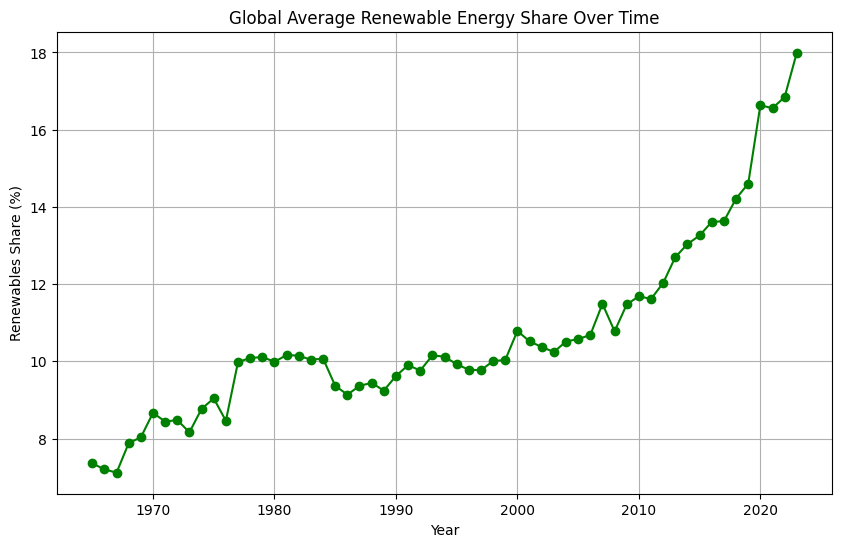

In [28]:
import matplotlib.pyplot as plt

# Average renewable energy share over time
avg_renewables = df.groupby('year')['renewables_share_energy'].mean()

# Plot the trend
plt.figure(figsize=(10, 6))
plt.plot(avg_renewables, marker='o', linestyle='-', color='green')
plt.title('Global Average Renewable Energy Share Over Time')
plt.xlabel('Year')
plt.ylabel('Renewables Share (%)')
plt.grid()
plt.savefig('../outputs/screenshots/global avg revewable energy.png', dpi=300)
plt.show()


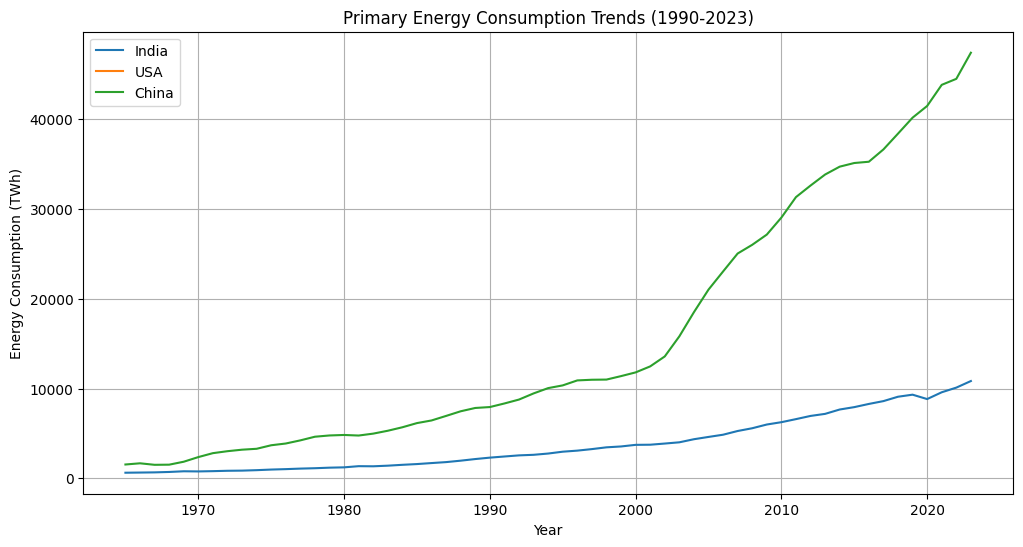

In [29]:
# Energy consumption trends for selected countries
countries = ['India', 'USA', 'China']
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['primary_energy_consumption'], label=country)

plt.title('Primary Energy Consumption Trends (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Energy Consumption (TWh)')
plt.legend()
plt.grid()
plt.savefig('../outputs/screenshots/energy consumption trends.png', dpi=300)
plt.show()


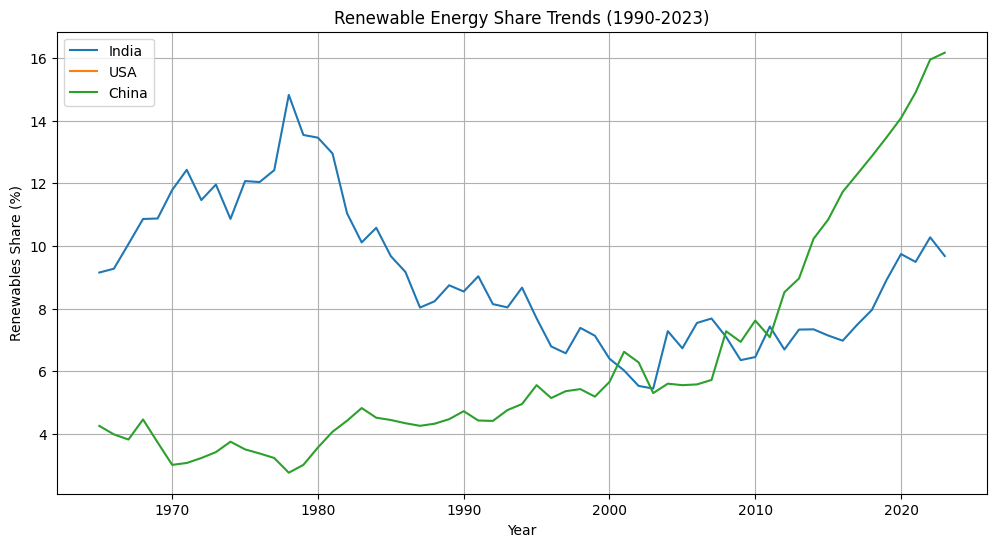

In [30]:
# Renewable energy share trends for selected countries
plt.figure(figsize=(12, 6))
for country in countries:
    country_data = df[df['country'] == country]
    plt.plot(country_data['year'], country_data['renewables_share_energy'], label=country)

plt.title('Renewable Energy Share Trends (1990-2023)')
plt.xlabel('Year')
plt.ylabel('Renewables Share (%)')
plt.legend()
plt.grid()
plt.savefig('../outputs/screenshots/renewable energy share trends.png', dpi=300)
plt.show()


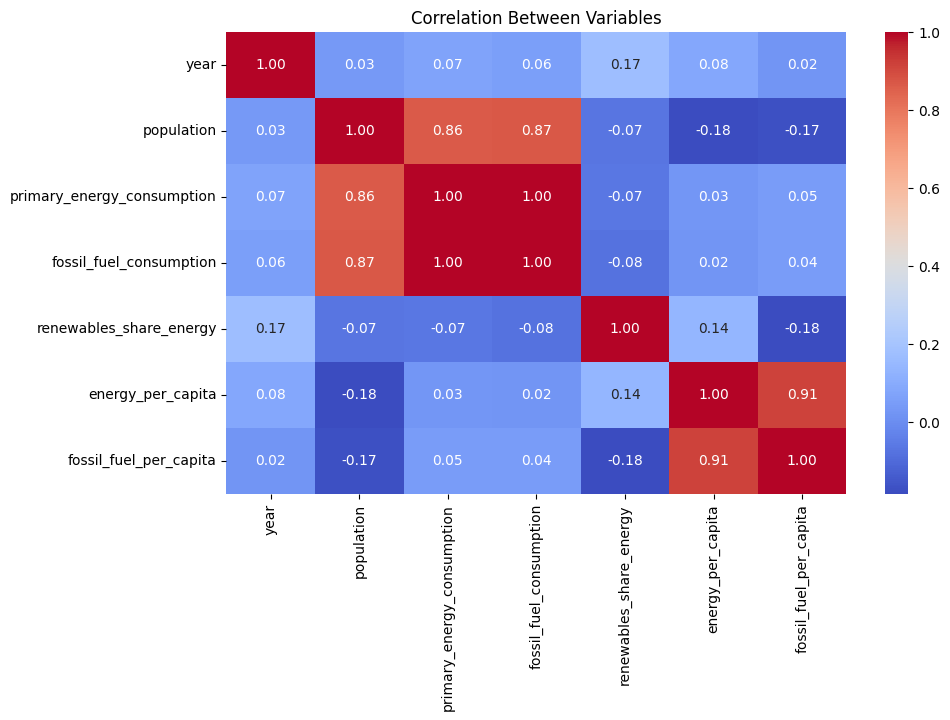

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cleaned dataset
df = pd.read_csv('../data/cleaned_data.csv')

# Select only numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Check for missing values and handle them
numeric_df = numeric_df.dropna()  # Alternatively, you can use numeric_df.fillna(0) or another strategy

# Correlation heatmap
plt.figure(figsize=(10, 6))
plt.savefig('../outputs/screenshots/correlation variables.png', dpi=300)
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Variables')
plt.show()


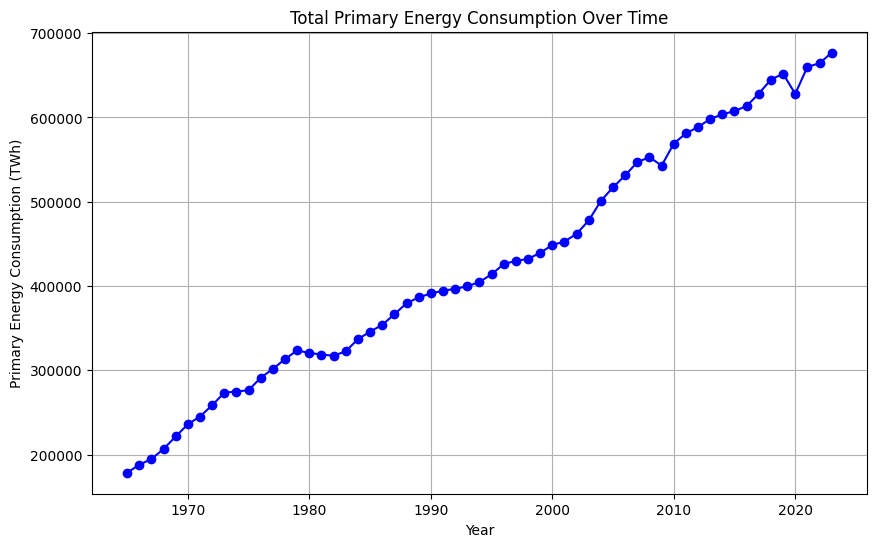

In [33]:
# Group by year and calculate total primary energy consumption
energy_trend = df.groupby('year')['primary_energy_consumption'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(energy_trend.index, energy_trend.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Primary Energy Consumption (TWh)')
plt.title('Total Primary Energy Consumption Over Time')
plt.grid()
plt.savefig('../outputs/screenshots/primary energy consumption over time.png', dpi=300)
plt.show()


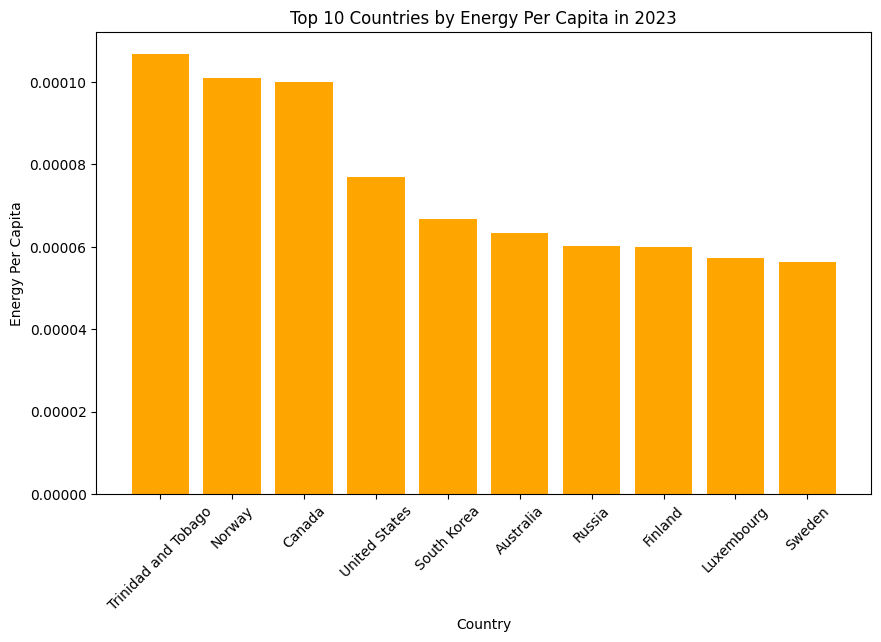

In [34]:
# Filter the latest year
latest_year = df['year'].max()
top_countries = df[df['year'] == latest_year].nlargest(10, 'energy_per_capita')

# Plot
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['energy_per_capita'], color='orange')
plt.xlabel('Country')
plt.ylabel('Energy Per Capita')
plt.title(f'Top 10 Countries by Energy Per Capita in {latest_year}')
plt.savefig('../outputs/screenshots/top 10 countries by energy.png', dpi=300)
plt.xticks(rotation=45)
plt.show()


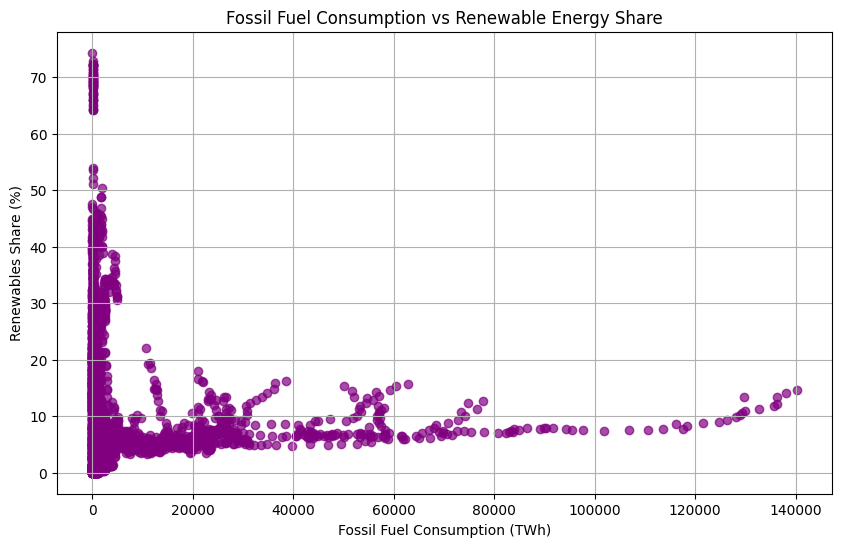

In [35]:
# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['fossil_fuel_consumption'], df['renewables_share_energy'], alpha=0.7, color='purple')
plt.xlabel('Fossil Fuel Consumption (TWh)')
plt.ylabel('Renewables Share (%)')
plt.title('Fossil Fuel Consumption vs Renewable Energy Share')
plt.grid()
plt.savefig('../outputs/screenshots/fossil fuel consumption vs renewable energy share.png', dpi=300)
plt.show()


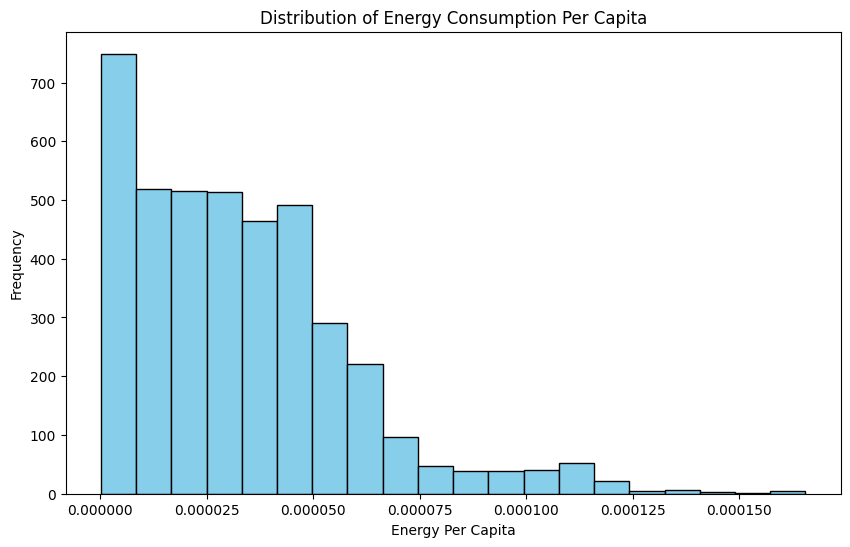

In [36]:
# Histogram
plt.figure(figsize=(10, 6))
plt.hist(df['energy_per_capita'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Energy Per Capita')
plt.ylabel('Frequency')
plt.title('Distribution of Energy Consumption Per Capita')
plt.savefig('../outputs/screenshots/Distribution of energy consumption.png', dpi=300)
plt.show()


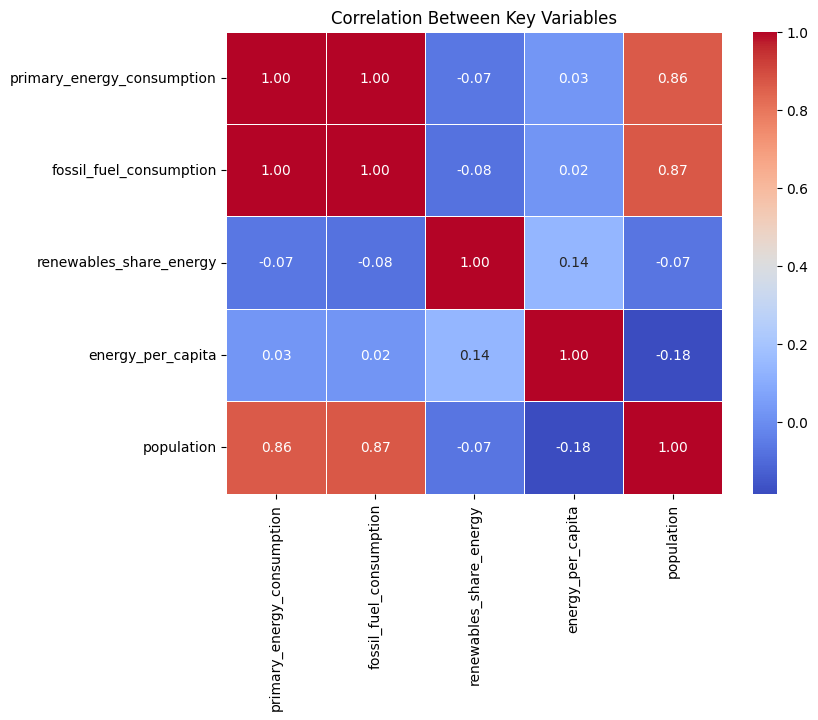

In [37]:
import seaborn as sns

# Select numerical columns of interest
corr_columns = ['primary_energy_consumption', 'fossil_fuel_consumption', 
                'renewables_share_energy', 'energy_per_capita', 'population']
corr_matrix = df[corr_columns].corr()

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Between Key Variables')
plt.savefig('../outputs/screenshots/correlation between key variables.png', dpi=300)
plt.show()


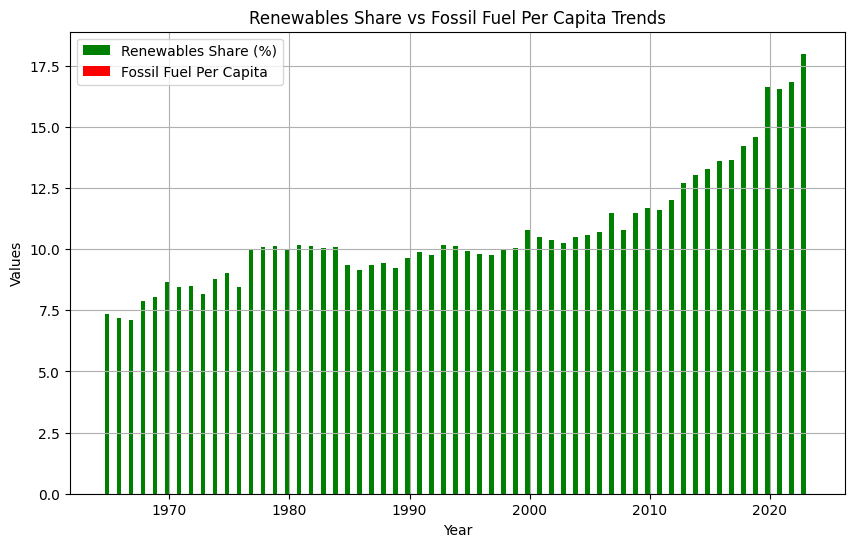

In [38]:
# Group data and calculate mean
renewables = df.groupby('year')['renewables_share_energy'].mean()
fossil = df.groupby('year')['fossil_fuel_per_capita'].mean()

# Plot grouped bar chart
x = renewables.index
width = 0.35

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, renewables.values, width=width, label='Renewables Share (%)', color='green')
plt.bar(x + width/2, fossil.values, width=width, label='Fossil Fuel Per Capita', color='red')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Renewables Share vs Fossil Fuel Per Capita Trends')
plt.savefig('../outputs/screenshots/renewables share vs fossil fuel per capita trends.png', dpi=300)
plt.legend()
plt.grid()
plt.show()


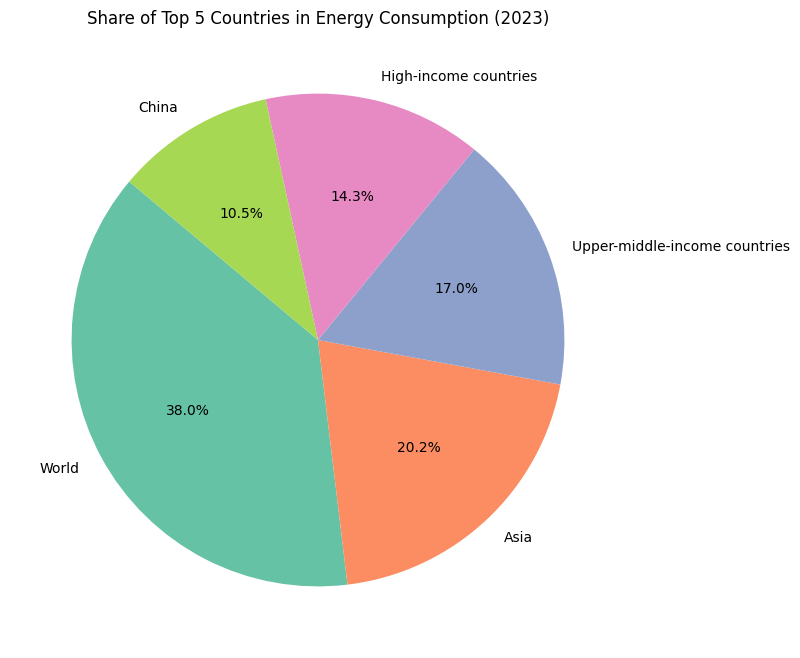

In [39]:
# Filter data for the latest year
latest_year = df['year'].max()
top5_countries = df[df['year'] == latest_year].nlargest(5, 'primary_energy_consumption')

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(top5_countries['primary_energy_consumption'], labels=top5_countries['country'], 
        autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title(f'Share of Top 5 Countries in Energy Consumption ({latest_year})')
plt.savefig('../outputs/screenshots/top 5 countries in energy consumption.png', dpi=300)
plt.show()


C:\Users\sahan\AppData\Local\Temp\ipykernel_34928\2236957789.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




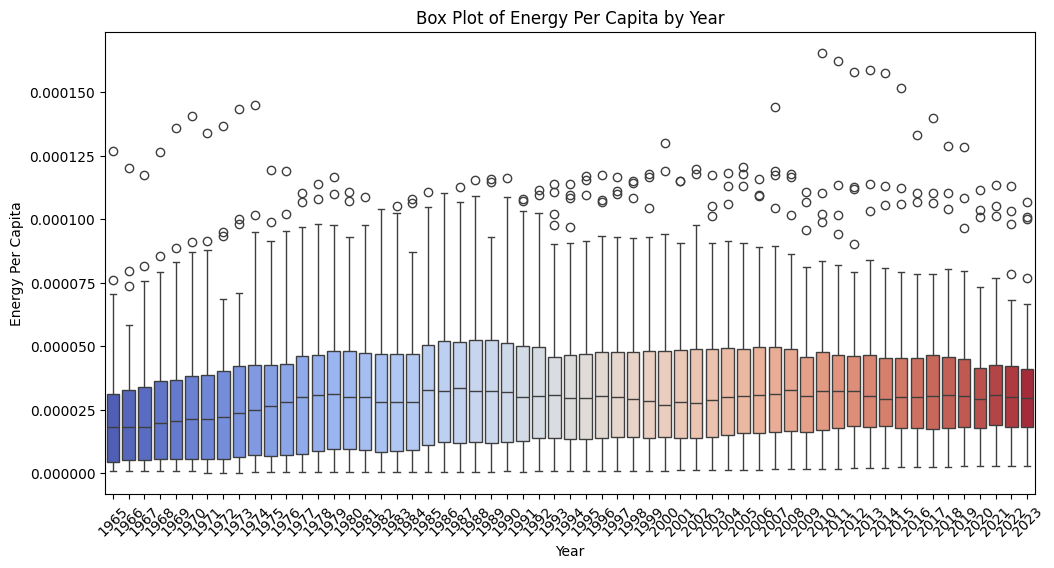

In [40]:
# Box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='energy_per_capita', data=df, palette='coolwarm')
plt.xticks(rotation=45)
plt.xlabel('Year')
plt.ylabel('Energy Per Capita')
plt.title('Box Plot of Energy Per Capita by Year')
plt.savefig('../outputs/screenshots/boxplot of energy per capita.png', dpi=300)
plt.show()


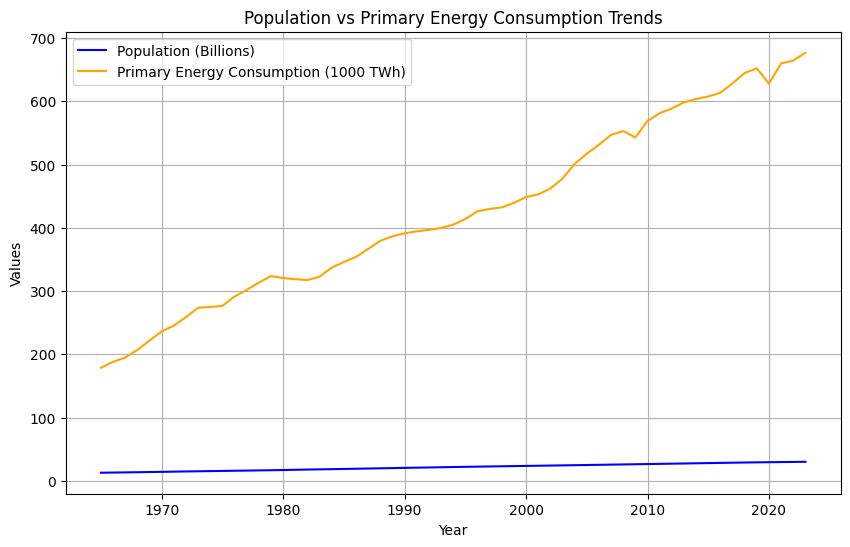

In [41]:
# Group data
population_trend = df.groupby('year')['population'].sum()
energy_trend = df.groupby('year')['primary_energy_consumption'].sum()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(population_trend.index, population_trend.values / 1e9, label='Population (Billions)', color='blue')
plt.plot(energy_trend.index, energy_trend.values / 1e3, label='Primary Energy Consumption (1000 TWh)', color='orange')
plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Population vs Primary Energy Consumption Trends')
plt.savefig('../outputs/screenshots/population vs primary energy consumption trends.png', dpi=300)
plt.legend()
plt.grid()
plt.show()


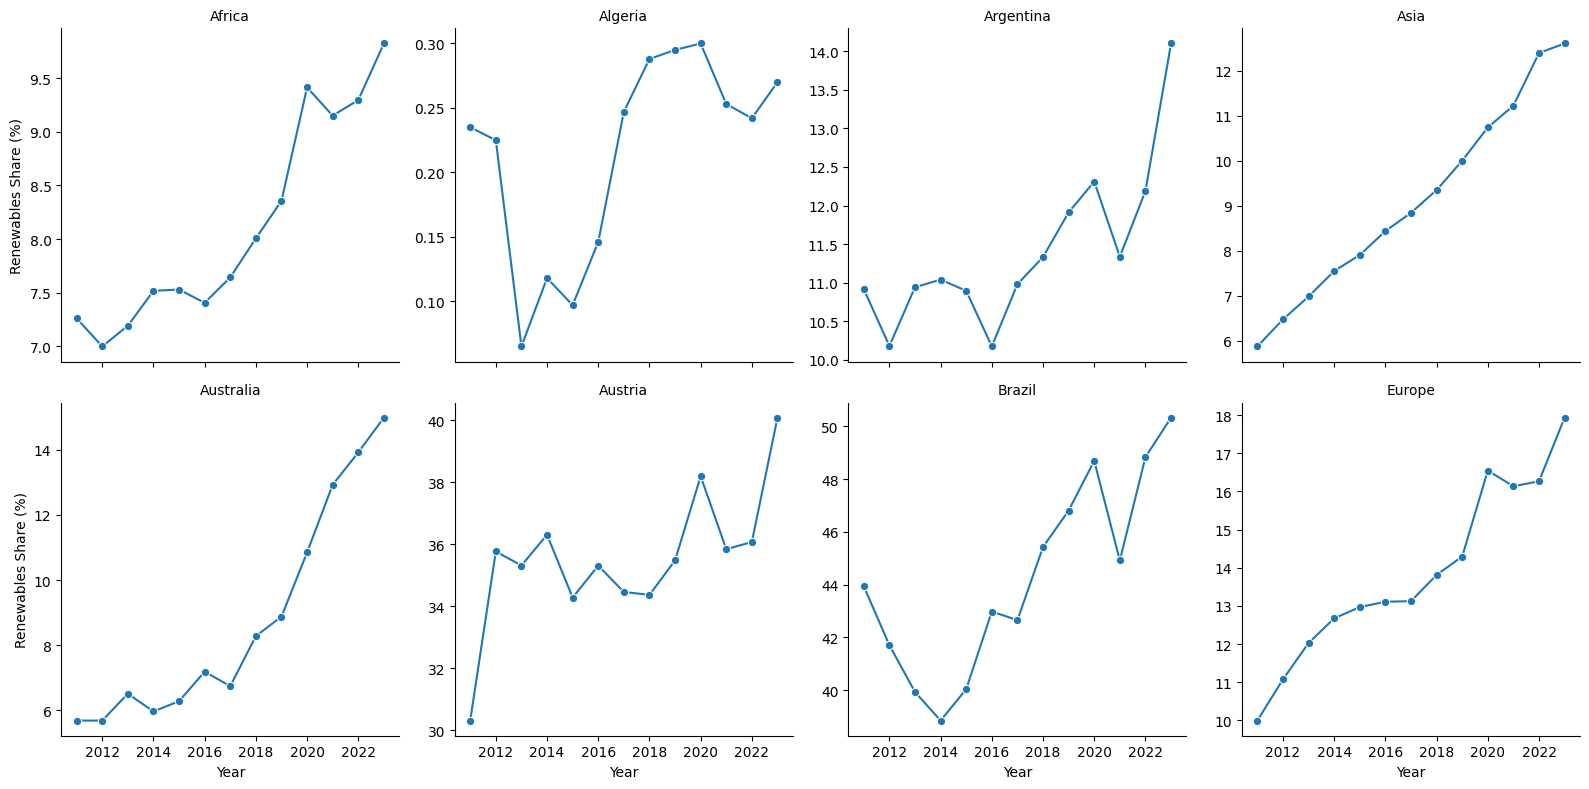

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select a subset of countries and years for faceted plots
selected_countries = df['country'].value_counts().index[:8]  # Top 8 countries with most data
filtered_df = df[df['country'].isin(selected_countries) & (df['year'] > 2010)]

# Faceted plot: Renewable energy share trends
g = sns.FacetGrid(filtered_df, col="country", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="year", y="renewables_share_energy", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Renewables Share (%)")
g.tight_layout()

# Save and show
plt.savefig('../outputs/screenshots/faceted_renewables_trends.png', dpi=300)
plt.show()


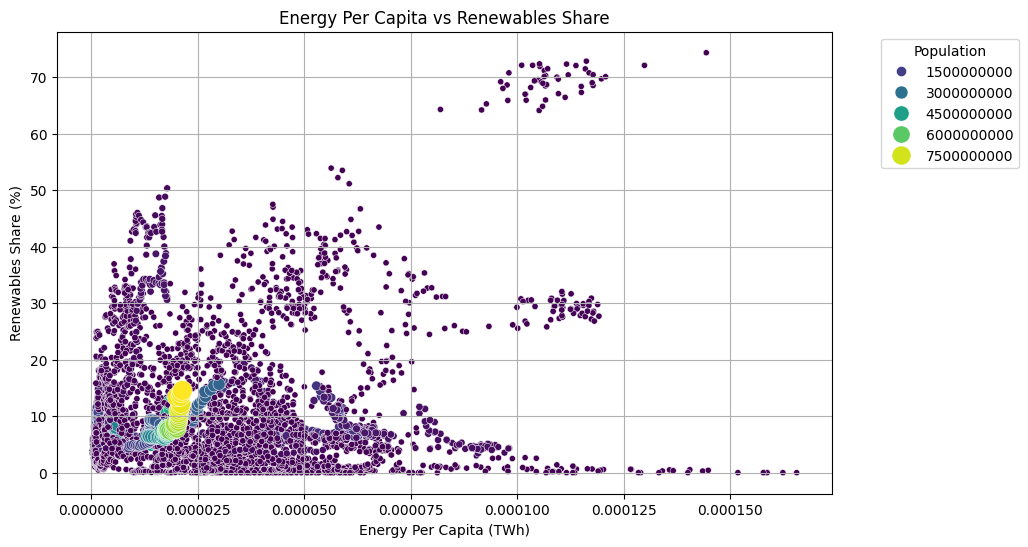

In [24]:
# Scatter plot: Energy Per Capita vs Renewables Share
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='energy_per_capita', y='renewables_share_energy', hue='population', size='population', sizes=(20, 200), palette='viridis')
plt.title('Energy Per Capita vs Renewables Share')
plt.xlabel('Energy Per Capita (TWh)')
plt.ylabel('Renewables Share (%)')
plt.grid()
plt.legend(title='Population', loc='upper right', bbox_to_anchor=(1.25, 1))
plt.savefig('../outputs/screenshots/energy_per_capita_vs_renewables.png', dpi=300)
plt.show()


In [44]:
import plotly.express as px

# Group data by country and calculate averages for radar chart
selected_countries = ['India', 'United States', 'China']
radar_data = df[df['country'].isin(selected_countries)].groupby('country').mean().reset_index()

# Create radar chart
fig = px.line_polar(radar_data, r=['primary_energy_consumption', 'renewables_share_energy', 'fossil_fuel_consumption'],
                    theta='country', line_close=True, title="Energy Profiles of Selected Countries")
fig.update_traces(fill='toself')
fig.update_layout(template='plotly_dark')
fig.show()


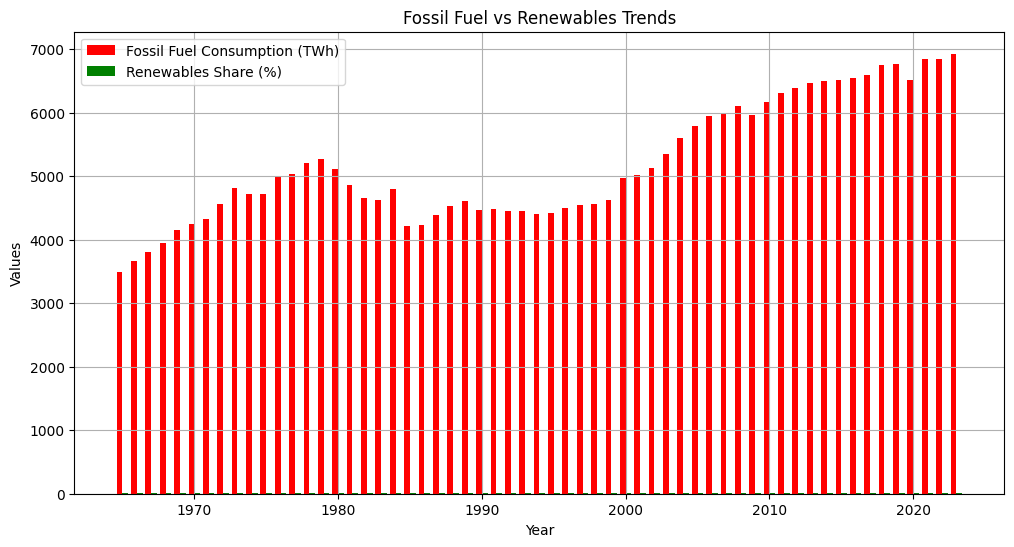

In [26]:
# Grouped bar chart: Fossil Fuel vs Renewables
fossil = df.groupby('year')['fossil_fuel_consumption'].mean()
renewables = df.groupby('year')['renewables_share_energy'].mean()
x = fossil.index

plt.figure(figsize=(12, 6))
width = 0.4
plt.bar(x - width/2, fossil, width=width, label='Fossil Fuel Consumption (TWh)', color='red')
plt.bar(x + width/2, renewables, width=width, label='Renewables Share (%)', color='green')
plt.title('Fossil Fuel vs Renewables Trends')
plt.xlabel('Year')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.savefig('../outputs/screenshots/fossil_vs_renewables_trends.png', dpi=300)
plt.show()


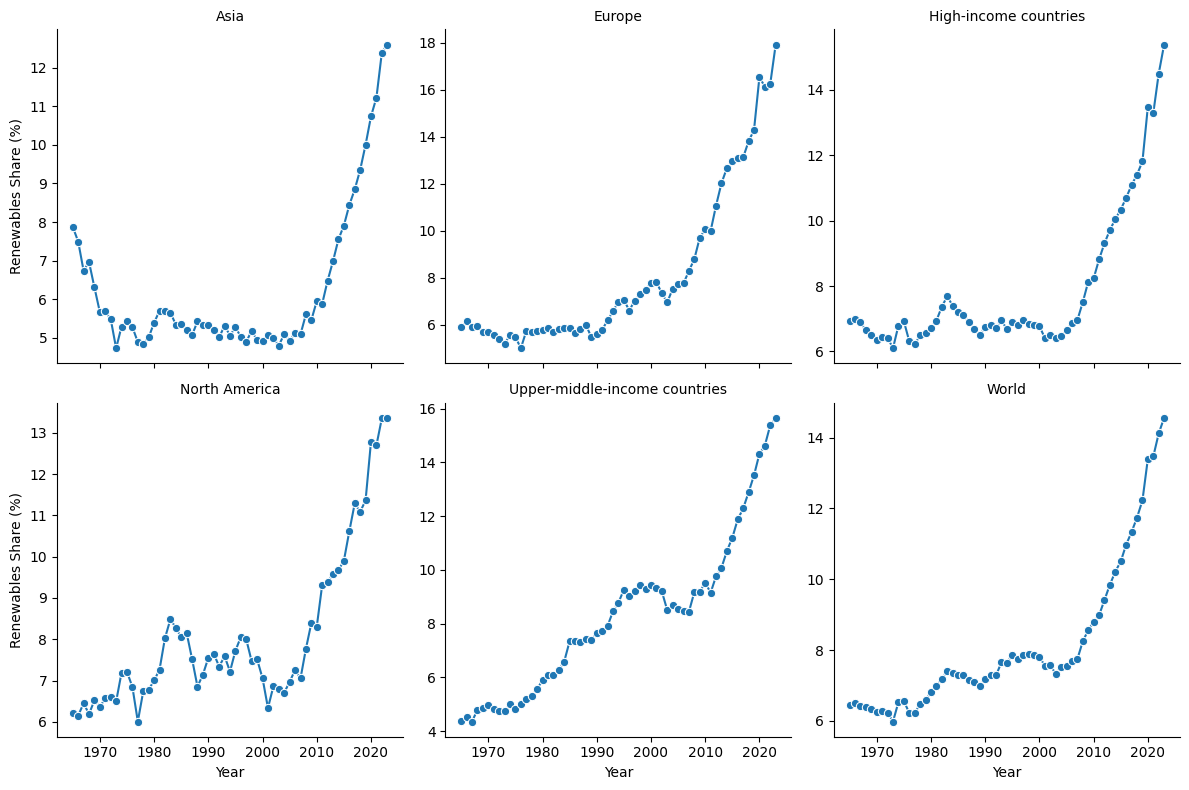

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top 6 countries by total energy consumption
top_countries = df.groupby('country')['primary_energy_consumption'].sum().nlargest(6).index
filtered_df = df[df['country'].isin(top_countries)]

# Create faceted plots
g = sns.FacetGrid(filtered_df, col="country", col_wrap=3, height=4, sharey=False)
g.map_dataframe(sns.lineplot, x="year", y="renewables_share_energy", marker="o")
g.set_titles("{col_name}")
g.set_axis_labels("Year", "Renewables Share (%)")
plt.savefig('../outputs/screenshots/faceted_renewables_trends.png', dpi=300)
plt.show()


In [46]:
import plotly.express as px

fig = px.line(
    df, x='year', y='renewables_share_energy',
    color='country', animation_frame='year',
    title="Animated Renewable Energy Growth Over Time"
)
fig.write_html('../outputs/animated_renewable_growth.html')
fig.show()


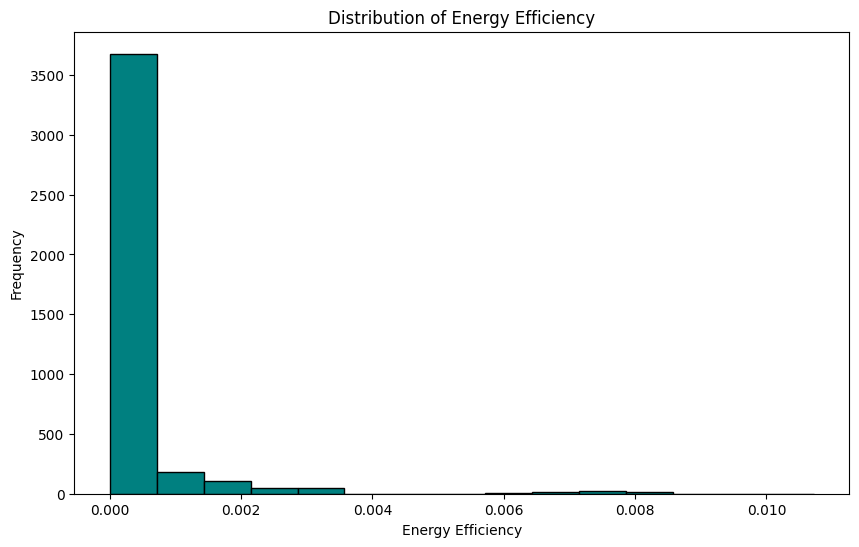

In [47]:
# Calculate energy efficiency (energy per capita vs renewables)
df['energy_efficiency'] = df['energy_per_capita'] * df['renewables_share_energy']

plt.figure(figsize=(10, 6))
plt.hist(df['energy_efficiency'].dropna(), bins=15, color='teal', edgecolor='black')
plt.title('Distribution of Energy Efficiency')
plt.xlabel('Energy Efficiency')
plt.ylabel('Frequency')
plt.savefig('../outputs/screenshots/energy_efficiency_distribution.png', dpi=300)
plt.show()
